# Uber Data Analysis Project

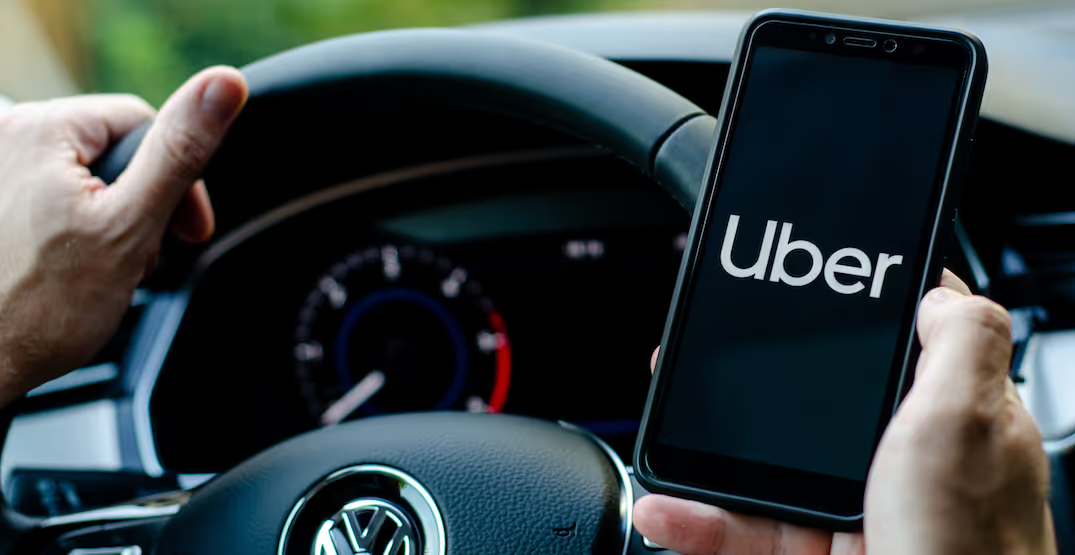

Uber Technologies, Inc., commonly referred to as Uber, is an American multinational transportation company that provides ride-hailing services, courier
services, food delivery, and freight transport. It is headquartered in San Francisco, California, and operates in approximately 70 countries and 10,500 
cities worldwide. It is the largest ridesharing company worldwide with over 150 million (15 Crores) monthly active users and 6 million (60 Lakhs) active
drivers and couriers. It facilitates an average of 28 million (2.8 Crore) trips per day and has facilitated 47 billion (4700 Crore) trips since its 
inception in 2010.

Uber generated $37.2 billion revenue in 2023


`The Inspiration`
Uber's origin story is rooted in a simple yet profound problem: the difficulty of finding a reliable taxi. In 2008, Garrett Camp, and his friends faced
this issue during a snowy evening in Paris. The frustration of not being able to get a cab led Camp to think about how technology could solve this 
problem by making rides more accessible.

`Early Concept`
Initially, Camp envisioned a timeshare limo service, which would allow people to share the cost of a premium car service. This idea evolved into a 
broader vision of a ride-sharing platform that could connect drivers with passengers through a smartphone app. Camp started working on the concept and
even bought the domain name "UberCab.com".


`Bringing Travis Kalanick on Board`
To bring the idea to life, Camp sought the help of Travis Kalanick, a successful entrepreneur who had previously founded and sold two tech companies,
including Red Swoosh. Kalanick was initially hesitant but eventually became enthusiastic about the potential of Camp's idea. In early 2009, Camp and
Kalanick teamed up todevelop the project further.

`Development and Launch`
Formation: UberCab was officially founded in March 2009 by Garrett Camp and Travis Kalanick.

`Prototype Development` 
They worked on building a prototype app that would allow users to book a ride with the tap of a button. The goal was to create a seamless experience 
for both riders and drivers.

`Beta Launch in San Francisco`
In 2010, UberCab launched its beta version in San Francisco. The service started with only a few cars, offering a premium black car service.
The initial target market was business professionals who valued convenience and were willing to pay a higher fare for a reliable service.

• **`First Ride`**: *The first Uber ride took place in San Francisco in June 2010.*

• **`Positive Reception`**: *The app quickly gained popularity among users who appreciated the convenience of hailing a ride through their smartphones.*

In October 2010, the company rebranded itself from UberCab to Uber. This change was partly driven by regulatory pressures, as the company faced legal 
challenges from taxi regulators who were concerned about the word "cab" in its name.
    
`Expansion to Other Cities:` Following the success in San Francisco, Uber expanded to New York City, Chicago, and other major cities in the United States.
    
`International Expansion:` By 2012, Uber had launched in Paris, marking its first international market. The company continued its global expansion at a
rapid pace, entering market Europe, Asia, and beyond.

`Ride-Sharing:` Uber's core service, allowing users to book rides from drivers using their own vehicles.

1. **UberX:** *Affordable everyday rides.*

2. **UberPOOL:** *Carpooling with other passengers heading in the same direction.*
    
3. **UberBLACK:** *High-end black car service.*
    
4. **UberXL:** *Rides for larger groups with spacious vehicles.*


**Uber Eats:** *Food delivery service connecting users with local restaurants.*

`Uber Freight:** *A platform that matches trucking companies with shippers who need to transport freight.*

`Uber for Business:` A service tailored for corporate travel needs.

`Revenue Streams`

**Commissions:**  *Uber takes a commission from each ride fare.*
    
**Subscription Services:** *Such as Uber Pass, providing benefits for a monthly fee.*

**Advertising:** *Potential future revenue from in-app ads.*

`Technological Innovations`

**Mobile App:** *The cornerstone of Uber's service, offering seamless ride booking, tracking, and secure payment processing.*

`Uber faced significant logistical challenges as it scaled operations globally:`

**ETA Estimation:** *Accurately estimating the arrival time of drivers.*

**Dynamic Pricing:** *Setting fares based on demand and supply.*

**Route Optimization:** *Finding the most efficient routes.*

**Driver and Rider Matching:** *Efficiently pairing drivers with riders.*

**Fraud Detection:** *Identifying and preventing fraudulent activities.*


In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [93]:
df = pd.read_csv("../Data/UberDataset.csv")
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [94]:
df.shape

(1156, 7)

In [95]:
# Missing Values
df.isnull().sum()

START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64

In [96]:
df.duplicated().sum()

1

In [97]:
df.columns

Index(['START_DATE', 'END_DATE', 'CATEGORY', 'START', 'STOP', 'MILES',
       'PURPOSE'],
      dtype='object')

In [98]:
# List the columns you want to check for duplicates
columns_to_check = []  # Replace with your column names
for i in df.columns:
    columns_to_check.append(i)
# Iterate over the columns and count duplicates
for column in columns_to_check:
    duplicate_count = df[column].duplicated().sum()  # Count how many duplicates (excluding the first occurrence)
    print(f"{column} has {duplicate_count} duplicate values.")

START_DATE has 1 duplicate values.
END_DATE has 1 duplicate values.
CATEGORY has 1153 duplicate values.
START has 978 duplicate values.
STOP has 967 duplicate values.
MILES has 899 duplicate values.
PURPOSE has 1145 duplicate values.


## Data Preprocessing

In [99]:
df["PURPOSE"].fillna("No Comment", inplace= True)

C:\Users\sagar\AppData\Local\Temp\ipykernel_19628\470123935.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["PURPOSE"].fillna("No Comment", inplace= True)


In [100]:
df["START_DATE"] = pd.to_datetime(df["START_DATE"], errors ="coerce")
df["END_DATE"] = pd.to_datetime(df["END_DATE"], errors ="coerce")

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  421 non-null    datetime64[ns]
 1   END_DATE    420 non-null    datetime64[ns]
 2   CATEGORY    1155 non-null   object        
 3   START       1155 non-null   object        
 4   STOP        1155 non-null   object        
 5   MILES       1156 non-null   float64       
 6   PURPOSE     1156 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 63.3+ KB


In [102]:
# Create two columns "Date" and "Time"
from datetime import datetime

df["Date"] = pd.DatetimeIndex(df["START_DATE"]).date
df["Time"] = pd.DatetimeIndex(df["START_DATE"]).hour

In [103]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,Date,Time
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,No Comment,2016-01-02,1.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0


| Time | Shift |
|--|--|
| 0:00 - 10:00 | Morning |
| 10:00 - 15:00 | Afternoon |
| 15:00 - 19:00 | Evening |
| 19:00 - 24:00 | Night |

In [104]:
df["Day-Night"] = pd.cut(x=df["Time"], bins = [0,10,15,19,24], labels = ["Morning","Afternoon", "Evening", "Night"])

In [105]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,Date,Time,Day-Night
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,No Comment,2016-01-02,1.0,Morning
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon


In [106]:
# Remove missing values
df.dropna(inplace=True)

In [107]:
df.shape

(413, 10)

## Data Visualization

### 1) In which category do people book the most Uber rides?

<Axes: xlabel='count', ylabel='CATEGORY'>

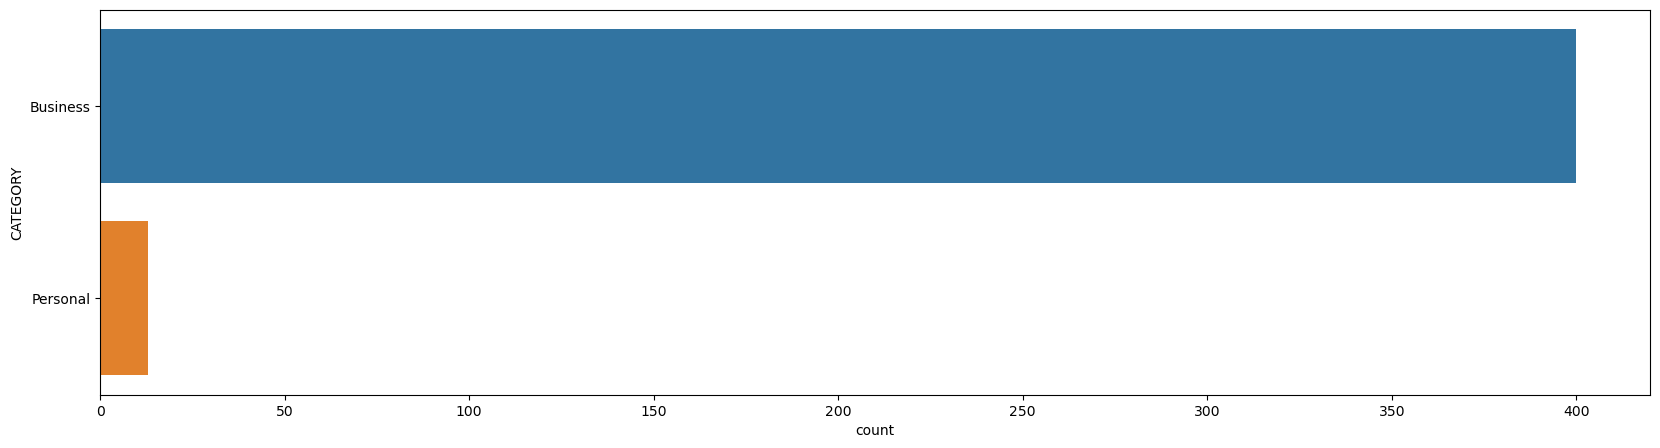

In [108]:
plt.rcParams['figure.figsize'] = [20, 5]
sns.countplot(data=df, y=df["CATEGORY"])

### 2) For which purpose do people book Uber rides the most?

<Axes: xlabel='count', ylabel='PURPOSE'>

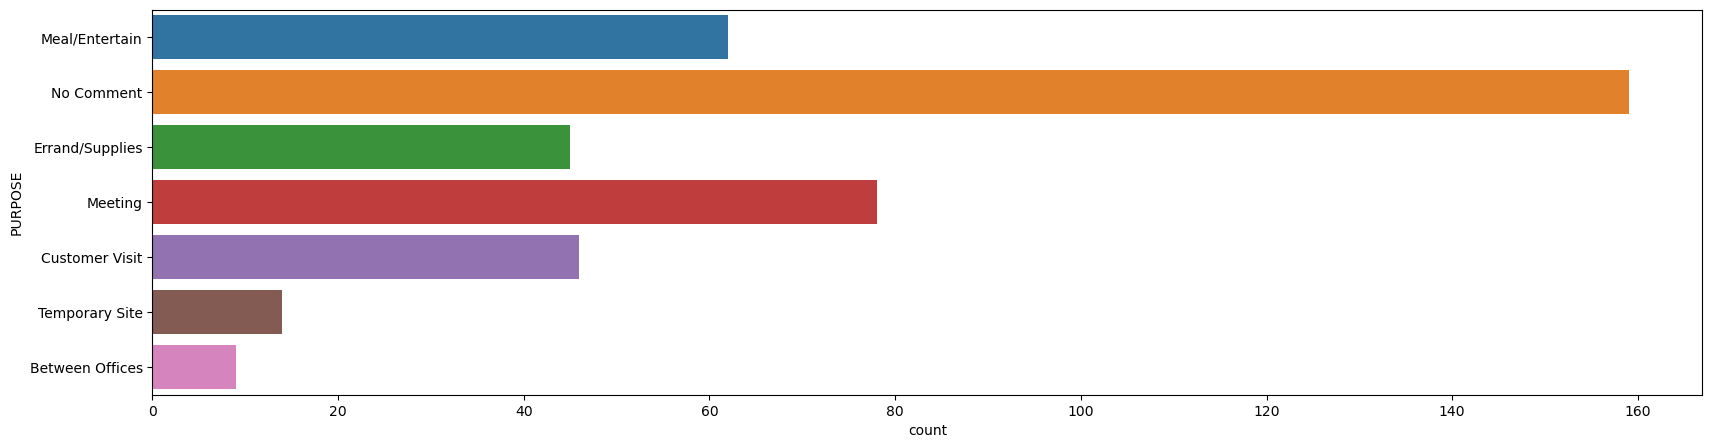

In [109]:
sns.countplot(data=df, y=df["PURPOSE"])

### 3) At what time do people book cabs the most from Uber?

C:\Users\sagar\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='count', ylabel='Day-Night'>

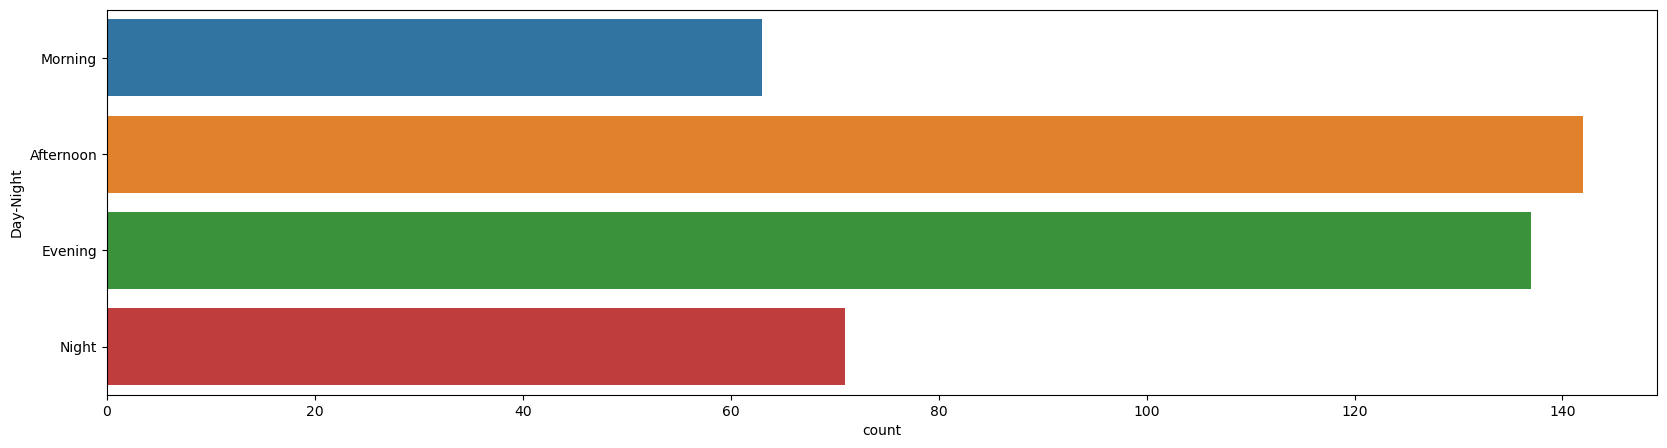

In [110]:
sns.countplot(data=df, y=df["Day-Night"])

### 4) In which months do people book Uber rides less frequently?

In [112]:
# Create a "Month" column 
df["Month"] = pd.DatetimeIndex(df["START_DATE"]).month
month_label = {1.0:"Jan", 2.0:"Feb", 3.0:"Mar", 4.0:"April", 5.0:"May", 6.0:"June",
               7.0:"July", 8.0:"Aug", 9.0:"Sep", 10.0:"Oct", 11.0:"Nov", 12.0:"Dec"}
df["Month"] = df.Month.map(month_label)


In [126]:
mon_count = df["Month"].value_counts(sort=False)
month_count = pd.DataFrame({"MONTH":mon.values,
                            "MAX MILES" :df.groupby("Month", sort=False)["MILES"].max()})

In [127]:
month_count

,MONTH,MAX MILES
Month,,
Jan,23,63.7
Feb,40,23.3
Mar,42,17.3
April,24,174.2
May,26,25.6
June,42,22.3
July,34,13.6
Aug,43,31.9
Sep,13,69.1


C:\Users\sagar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sagar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Month'>

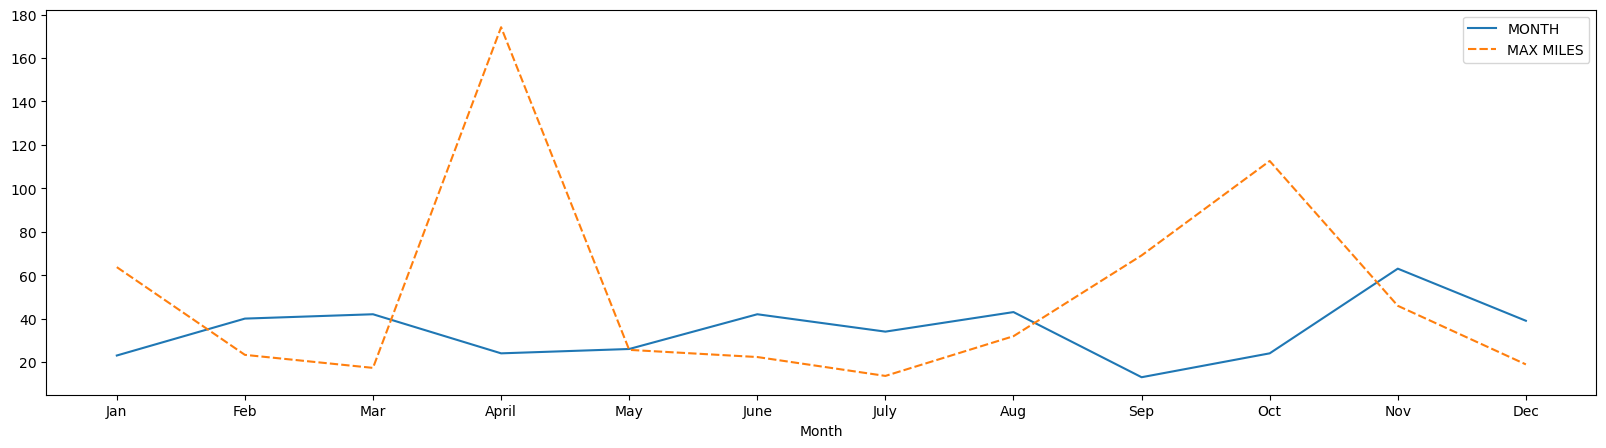

In [128]:
sns.lineplot(data = month_count)

###  5) On which days of the week do people book Uber rides the most?

In [156]:
# Assuming df is your DataFrame and it has a 'START_DATE' column
df['Day'] = df['START_DATE'].dt.weekday

# Map the day numbers to day labels
day_label = {
    0: 'Mon', 1: 'Tues', 2: 'Wed', 3: 'Thur', 4: 'Fri', 5: 'Sat', 6: 'Sun'
}
df['Day'] = df['Day'].map(day_label)

# Define the custom order for the days
day_order = ['Mon', 'Tues', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun']

# Convert the 'Day' column to a categorical type with the specified order
df['Day'] = pd.Categorical(df['Day'], categories=day_order, ordered=True)

C:\Users\sagar\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='Day', ylabel='count'>

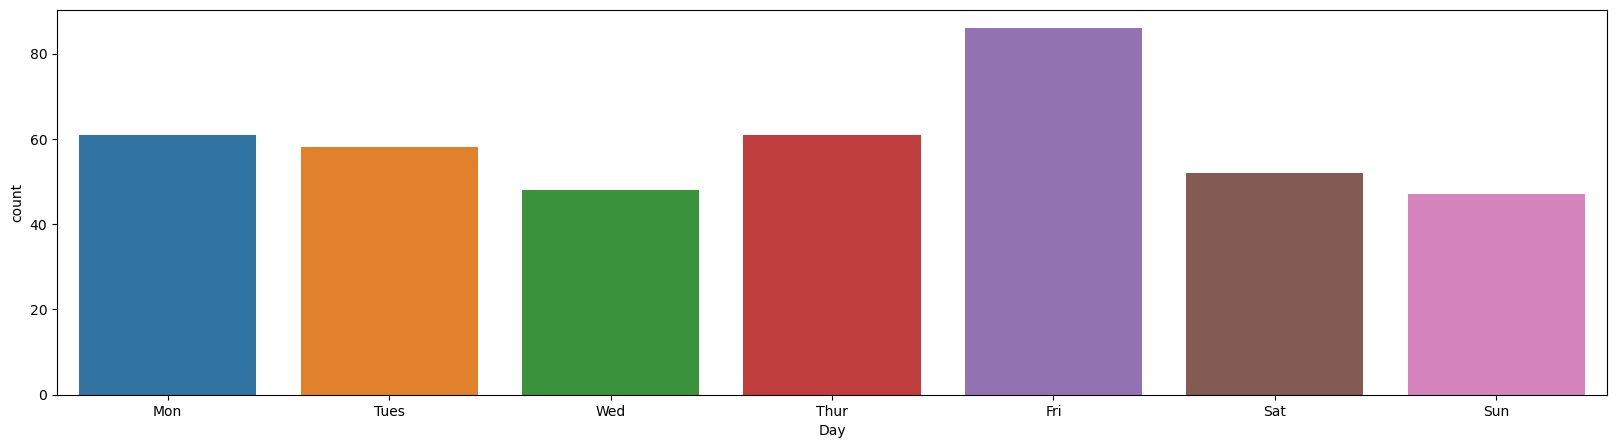

In [157]:
day_count = df["Day"].value_counts()

sns.barplot(x=day_count.index, y=day_count)

### 6) How many miles do people usually book a cab for through Uber?

<Axes: >

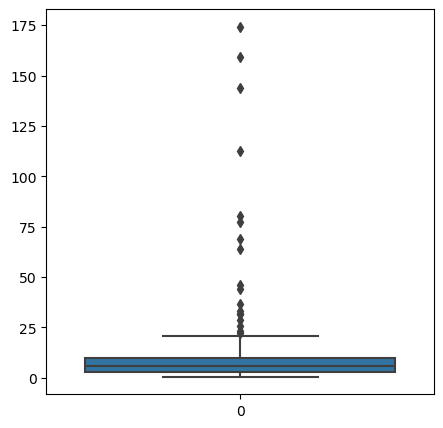

In [166]:
plt.figure(figsize=(5,5))
sns.boxplot(df["MILES"])

<Axes: >

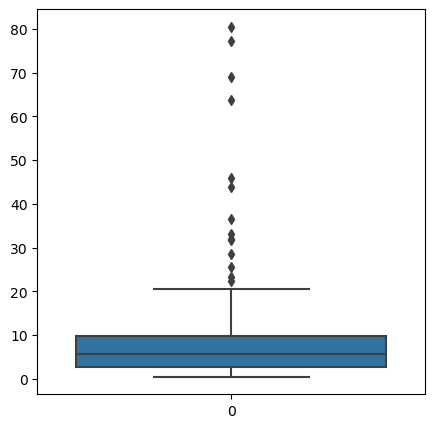

In [167]:
plt.figure(figsize=(5,5))
sns.boxplot(df[df["MILES"]<100]["MILES"])

<Axes: >

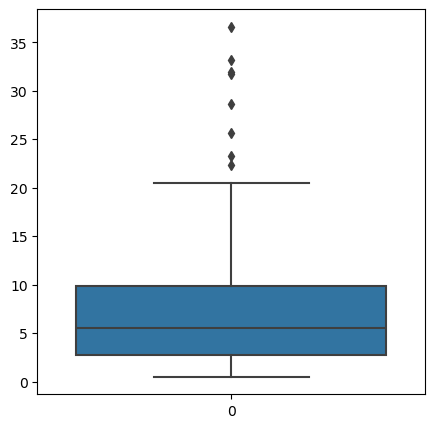

In [168]:
plt.figure(figsize=(5,5))
sns.boxplot(df[df["MILES"]<40]["MILES"])

C:\Users\sagar\AppData\Local\Temp\ipykernel_19628\2117430055.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df["MILES"]<40]["MILES"])
C:\Users\sagar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='MILES', ylabel='Density'>

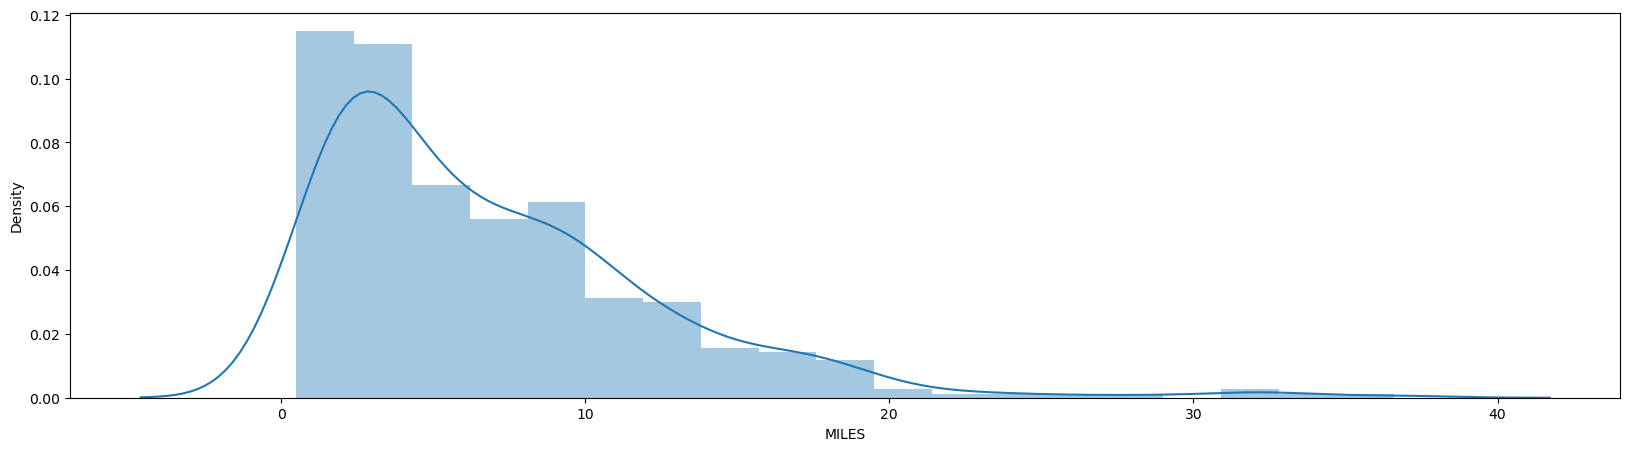

In [170]:
sns.distplot(df[df["MILES"]<40]["MILES"])

*0 to 20 miles do people usually book a cab for through Uber.*

***